In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
movie = pd.read_csv("movie.csv")
movie.head(20)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [3]:
#check the length of the dataset and the size of the last dimension
len(movie), movie.index.shape[-1]

(50000, 50000)

In [4]:
#check the shape of the dataset
print(f'The shape of the dataset is:{movie.shape}')

The shape of the dataset is:(50000, 2)


In [5]:
#Let's check the number of positive and negative reviews

positive_review = movie[movie['sentiment'] == 'positive']
print(f'We have {len(positive_review)} good reviews. \n The first ten are: \n{positive_review[:10]}\n\n')
negative_review = movie[movie['sentiment'] == 'negative']
print(f'We have {len(negative_review)} bad reviews.\n The first 10 are: {negative_review[:10]}')



We have 25000 good reviews. 
 The first ten are: 
                                               review sentiment
0   One of the other reviewers has mentioned that ...  positive
1   A wonderful little production. <br /><br />The...  positive
2   I thought this was a wonderful way to spend ti...  positive
4   Petter Mattei's "Love in the Time of Money" is...  positive
5   Probably my all-time favorite movie, a story o...  positive
6   I sure would like to see a resurrection of a u...  positive
9   If you like original gut wrenching laughter yo...  positive
14  This a fantastic movie of three prisoners who ...  positive
16  Some films just simply should not be remade. T...  positive
18  I remember this film,it was the first film i h...  positive


We have 25000 bad reviews.
 The first 10 are:                                                review sentiment
3   Basically there's a family where a little boy ...  negative
7   This show was an amazing, fresh & innovative i...  negative
8   En

C:\Users\chiez\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\chiez\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


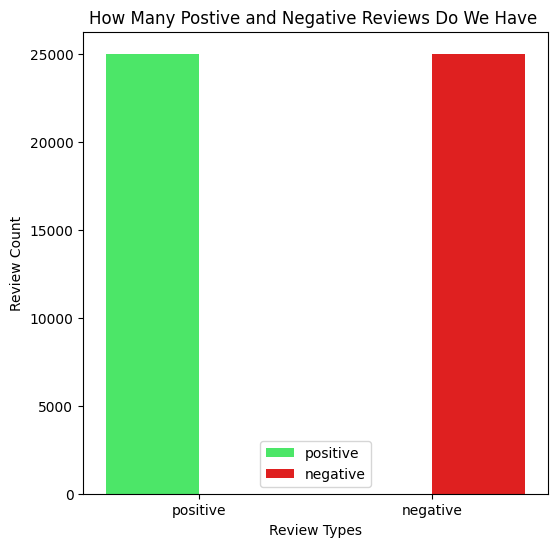

In [6]:
#Visualizing the number of negative and positive review using seaborn

plt.figure(figsize=(6,6))
unique_categories = set(movie['sentiment'])

palette = {'positive':'#33FF57', 'negative':'#FF0000'}
sns.countplot(x="sentiment", hue="sentiment", data=movie, palette= palette, dodge=True)

plt.legend(unique_categories)
plt.title('How Many Postive and Negative Reviews Do We Have ')
plt.xlabel('Review Types')
plt.ylabel('Review Count')
plt.show()




<Figure size 800x500 with 0 Axes>

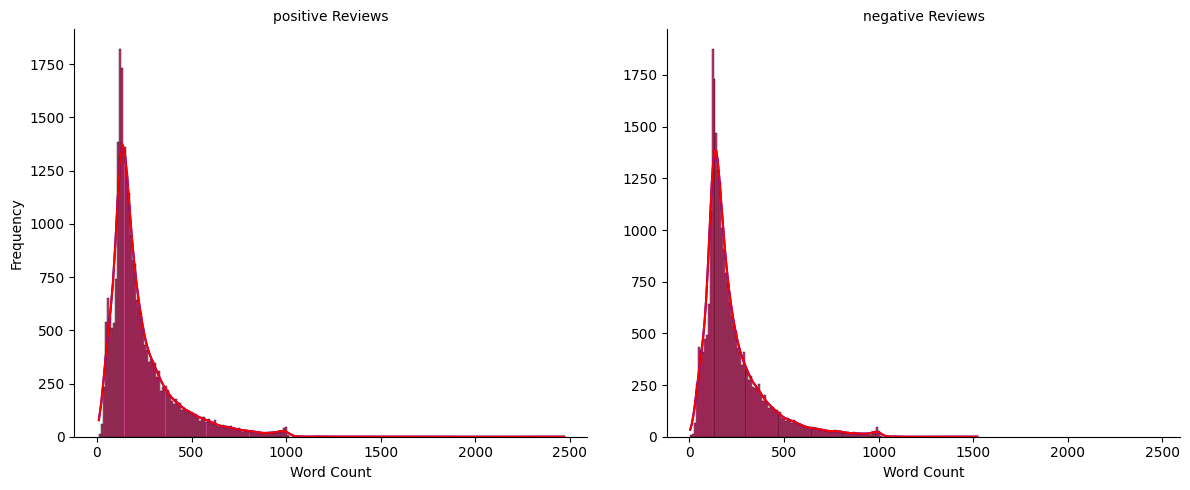

In [51]:
# Tokenize sentences and count words
positive_review_words = [len(review.split()) for review in positive_review['review']]
negative_review_words = [len(review.split()) for review in negative_review['review']]

# Create displot
plt.figure(figsize=(8, 5))
#sns.histplot(positive_review_words, bins=20, kde=True, stat='frequency', kde_kws=dict(cut=3), color='skyblue', alpha=.4, edgecolor=(1, 1, 1, .4))
#sns.histplot(negative_review_words, kde=True, stat='frequency', kde_kws=dict(cut=3), color='skyblue', alpha=.4, edgecolor=(1, 1, 1, .4))

# data = pd.DataFrame({
#     'Word Count': positive_review_words + negative_review_words,
#     'Review Type': ['positive'] * len(positive_review_words) + ['negative'] * len(negative_review_words)
# # })
g = sns.FacetGrid(data, col="Review Type", sharey=False, height=5, aspect=1.2)

g.map_dataframe(sns.histplot, x="Word Count", kde=True, color='blue', data=data[data['Review Type'] == 'positive'])
g.map_dataframe(sns.histplot, x="Word Count", kde=True, color='red', data=data[data['Review Type'] == 'negative'])

# Add titles and labels
g.set_axis_labels('Word Count', 'Frequency')
g.set_titles(col_template="{col_name} Reviews")


plt.show()

